# Imports

In [1]:
using QSWalk

using PyPlot # for plot
using LightGraphs # for PathGraph

# Simulation parametes

In [2]:
dim = 71;
steps = 10;

In [3]:
s0 = Int((dim+1)/2);

In [4]:
scaley = false;

# Adjacency matrix

In [5]:
# Adjency matrix for the line
# package LightGraphs provides PathGraph
adjmtx = adjacency_matrix(PathGraph(dim));
# this is equvalent to 
#adjmtx = spdiagm((ones(dim-1),ones(dim-1)),(-1,1));

# Local interaction regime

In [6]:
ham = adjmtx;
lin = classical_lindblad_operators(adjmtx);
evo = global_operator(ham, lin);
init = proj(s0, dim);
time_step = 1.0;
time_points = collect(0:steps)*time_step;

In [7]:
res_class = evolve(evo, init, time_points);

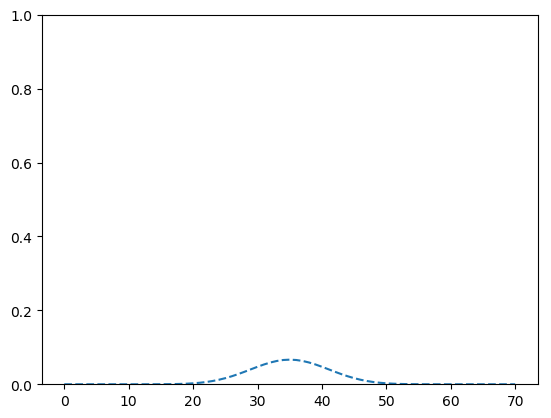

In [8]:
plot(diag(res_class[steps]),linestyle="dashed",scaley=scaley);

# Global interaction regime

In [9]:
ham = adjmtx;
lin = [adjmtx];
omg = 0.0;
evo = global_operator(ham, lin, omg);
init = proj(s0, dim);
time_step = 1.0;
time_points = collect(0:steps)*time_step;

In [10]:
res_glob = evolve(evo, init, time_points);

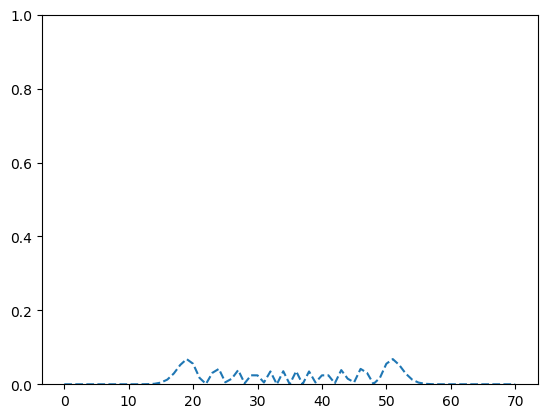

In [11]:
plot(diag(res_glob[steps]),linestyle="dashed",scaley=scaley);

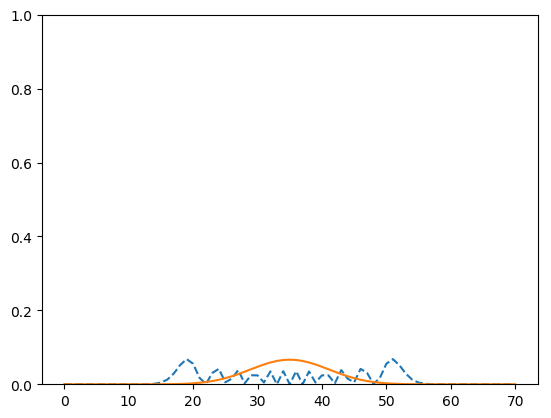

In [12]:
plot(diag(res_glob[steps]),linestyle="dashed",scaley=scaley);
plot(diag(res_class[steps]),scaley=scaley);

# Non-moralizing global interaction regime

In [13]:
ham = adjmtx;
lin = [adjmtx];
omg = 1.0; # different value of omega -> no Hamiltonian part
evo = global_operator(ham, lin, omg);
init = proj(s0, dim);
time_step = 1.0;
time_points = collect(0:steps)*time_step;

In [14]:
res_glob_lind = evolve(evo, init, time_points);

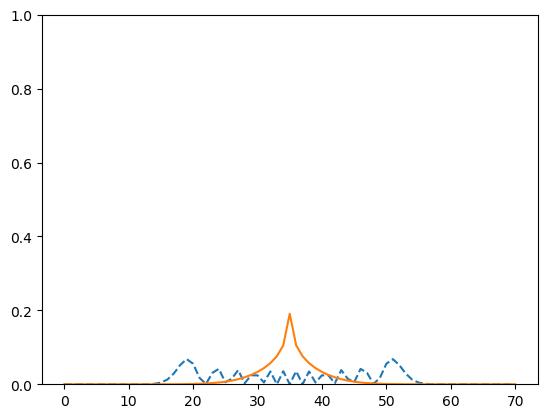

In [15]:
plot(diag(res_glob[steps]),linestyle="dashed",scaley=false);
plot(diag(res_glob_lind[steps]),scaley=false);

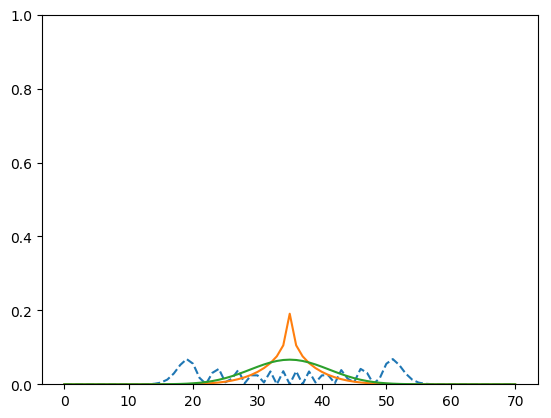

In [16]:
plot(diag(res_glob[steps]),linestyle="dashed",scaley=false);
plot(diag(res_glob_lind[steps]),scaley=false);
plot(diag(res_class[steps]),scaley=false);